# Imports

In [3]:
import numpy as np
from tensorflow import keras
import analyze

# Load data and generate noise

In [15]:
# Load data
dataset = np.load('data.npy')

# Load preprocessed data
data = np.load('data_preprocessed_512.npy')

# Load generator
generator = keras.models.load_model('best/') 

# Decide how many events to generate
number_of_events = len(data)

# Generate signals using generator
noise = np.random.randn(number_of_events, 128)
noise = np.expand_dims(noise, axis=-1) 
generated_traces = generator.predict_on_batch(noise)
generated_traces = generated_traces[:,:,0]

# Scaling
# generated_traces = generated_traces * dataset.std()+dataset.mean()


# Analyze the results

In [16]:
analyze.mean_std(data, generated_traces)

Mean data: -1.4336996031661545e-17
Mean generated: 0.05153064802289009
Std data: 1.0000000000000002
Std generated: 0.9975740313529968


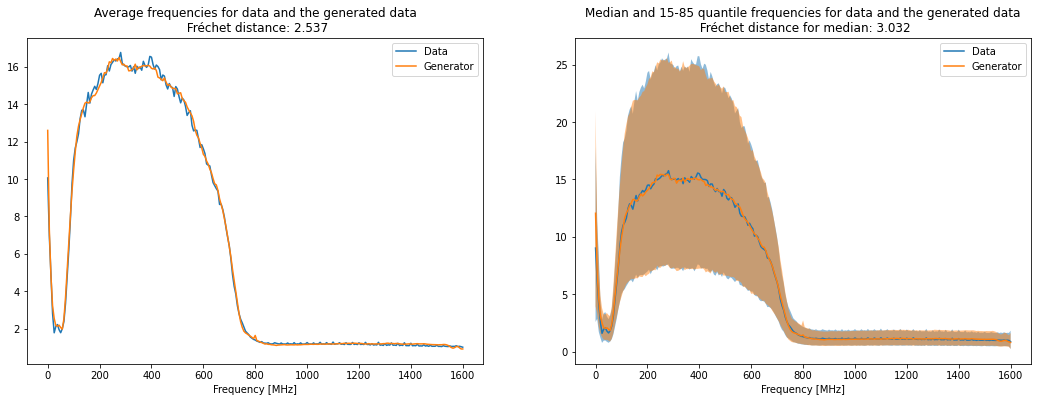

In [17]:
analyze.avg_med_quantile_freq(data, generated_traces)

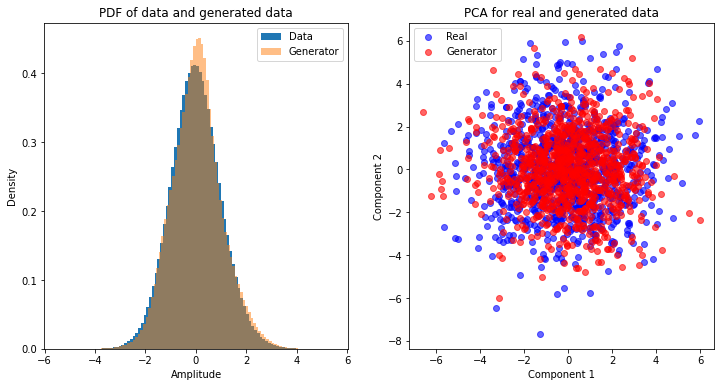

In [18]:
analyze.plot_distributions(data, generated_traces)